# IMPORTS

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PIB par habitant et par région

## Niveau national

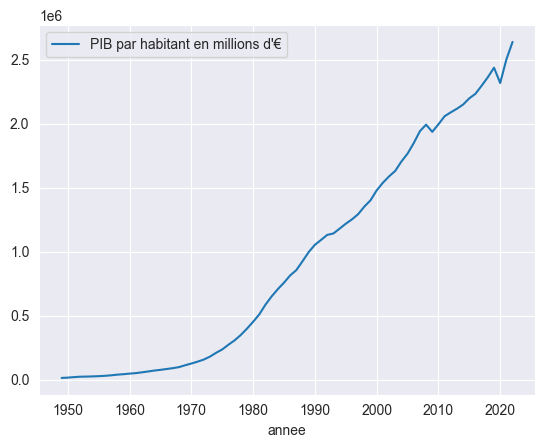

In [11]:
# Lecture du dataset pour l'évolution du PIB à l'échelle nationale
pibFR = pd.read_csv('PIB/pib-france.csv', delimiter=',')

# Lecture du dataset pour l'évolution du PIB à l'échelle régionale (+ France métropolitaine)
pibReg = pd.read_excel('PIB/pib-region.xlsx')

pibFR.plot(kind= 'line', x = 'annee', y = 'pib')
legend = plt.legend(["PIB par habitant en millions d'€"])

<Axes: xlabel='Région'>

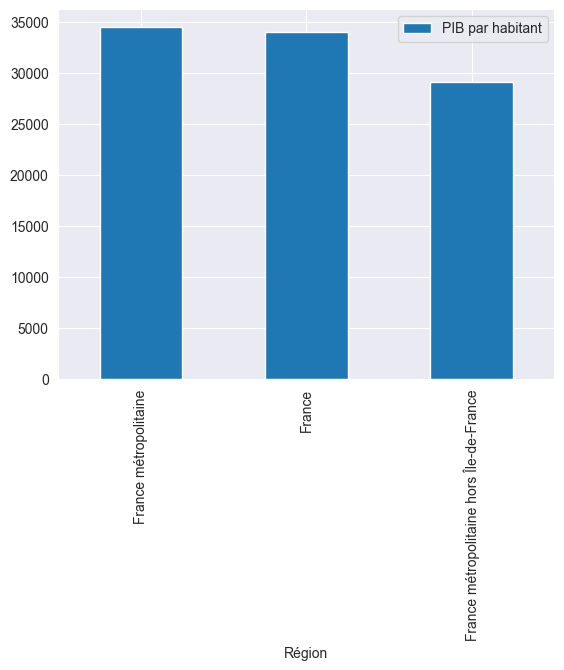

In [12]:
pibNat = pibReg.loc[[1, 2, 7]]
pibNat.plot(kind= 'bar', x = 'Région', y = 'PIB par habitant')

## Niveau régional (2020)

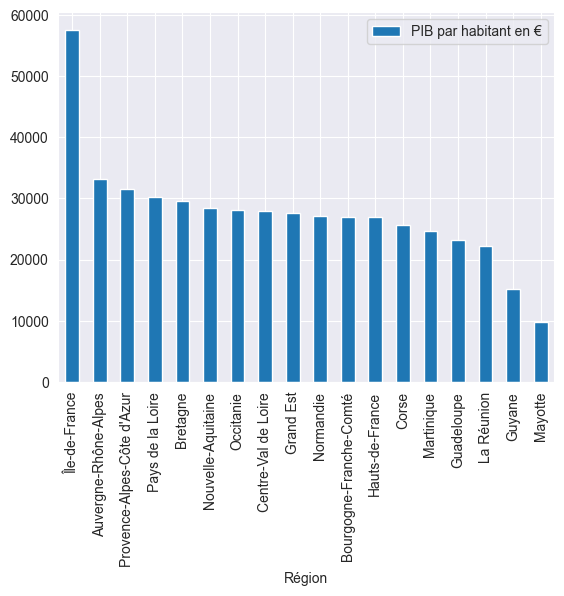

In [13]:
pibRegions = pibReg.drop([1, 2, 7])
pibRegions.plot(kind= 'bar', x = 'Région', y = 'PIB par habitant')
legend = plt.legend(["PIB par habitant en €"])

## Évolution du PIB entre 2019 et 2020 (hors Mayotte)

### Régions

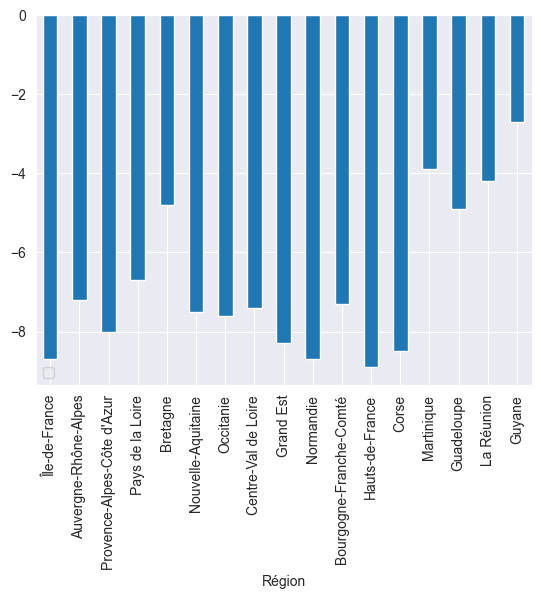

In [14]:
pibRegionsEvo = pibRegions.drop([20])
pibRegionsEvo.plot(kind= 'bar', x = 'Région', y = 'Évolution PIB 2019-2020', label = "_nolegend_")
legend = plt.legend(["PIB 2019 VS 2020 en %"])

### Métropole et Outre-Mer

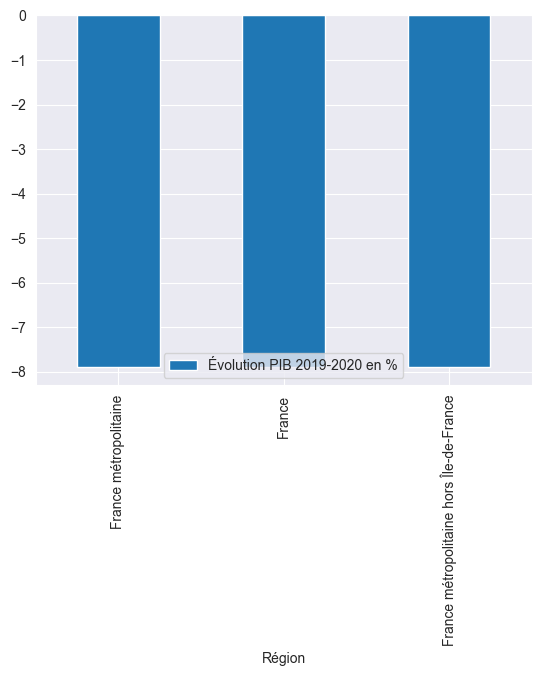

In [15]:
pibNat.plot(kind= 'bar', x = 'Région', y = 'Évolution PIB 2019-2020')
legend = plt.legend(["Évolution PIB 2019-2020 en %"])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [18]:
train_data, test_data, train_target, test_target = train_test_split(
    pibFR[['annee']], pibFR['pib'], test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(train_data, train_target)

predictions = model.predict(test_data)

next_year = 2027

prediction_PIB = model.predict([[next_year]])
print(f'Prédiction du PIB de {next_year}: {prediction_PIB[0]}')

r_squared_rf = r2_score(test_target, predictions)
print(f'Coefficient de détermination (R²) pour la regression linéaire : {r_squared_rf*100}')

Prédiction du PIB de 2027: 2506811.9113474637
Coefficient de détermination (R²) pour la regression linéaire : 95.1000590510026


C:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
